In [59]:
import numpy as np
import pandas as pd
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("train.csv")
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.30,316.00,3.35,172.00,1601.00,179.80,63.00,394.00,9.70,3.00,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.90,364.00,3.54,63.00,1440.00,134.85,88.00,361.00,11.00,3.00,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.30,299.00,3.55,131.00,1029.00,119.35,50.00,199.00,11.70,4.00,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.60,256.00,3.50,58.00,1653.00,71.30,96.00,269.00,10.70,3.00,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.10,346.00,3.65,63.00,1181.00,125.55,96.00,298.00,10.60,4.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.80,309.00,3.56,38.00,1629.00,79.05,224.00,344.00,9.90,2.00,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.90,260.00,3.43,62.00,1440.00,142.00,78.00,277.00,10.00,4.00,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.00,225.00,3.19,51.00,933.00,69.75,62.00,200.00,12.70,2.00,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.70,248.00,2.75,32.00,1003.00,57.35,118.00,221.00,10.60,4.00,D


#### C (censored) indicates the patient was alive at N_Days, CL indicates the patient was alive at N_Days due to liver a transplant, and D indicates the patient was deceased at N_Days.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [62]:
df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [63]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00
mean,3952.00,2030.17,18373.15,2.59,350.56,3.55,83.90,1816.75,114.60,115.34,265.23,10.63,3.03
std,2282.12,1094.23,3679.96,3.81,195.38,0.35,75.90,1903.75,48.79,52.53,87.47,0.78,0.87
min,0.00,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1976.00,1230.00,15574.00,0.70,248.00,3.35,39.00,834.00,75.95,84.00,211.00,10.00,2.00
50%,3952.00,1831.00,18713.00,1.10,298.00,3.58,63.00,1181.00,108.50,104.00,265.00,10.60,3.00
75%,5928.00,2689.00,20684.00,3.00,390.00,3.77,102.00,1857.00,137.95,139.00,316.00,11.00,4.00
max,7904.00,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,563.00,18.00,4.00


In [64]:
df.drop(columns=["Age"],inplace=True)
df

,id,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,M,N,N,N,N,2.30,316.00,3.35,172.00,1601.00,179.80,63.00,394.00,9.70,3.00,D
1,1,2574,Placebo,F,N,N,N,N,0.90,364.00,3.54,63.00,1440.00,134.85,88.00,361.00,11.00,3.00,C
2,2,3428,Placebo,F,N,Y,Y,Y,3.30,299.00,3.55,131.00,1029.00,119.35,50.00,199.00,11.70,4.00,D
3,3,2576,Placebo,F,N,N,N,N,0.60,256.00,3.50,58.00,1653.00,71.30,96.00,269.00,10.70,3.00,C
4,4,788,Placebo,F,N,Y,N,N,1.10,346.00,3.65,63.00,1181.00,125.55,96.00,298.00,10.60,4.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,F,N,N,N,N,0.80,309.00,3.56,38.00,1629.00,79.05,224.00,344.00,9.90,2.00,C
7901,7901,1492,Placebo,F,N,Y,N,N,0.90,260.00,3.43,62.00,1440.00,142.00,78.00,277.00,10.00,4.00,C
7902,7902,1576,D-penicillamine,F,N,N,Y,S,2.00,225.00,3.19,51.00,933.00,69.75,62.00,200.00,12.70,2.00,D
7903,7903,3584,D-penicillamine,M,N,Y,N,N,0.70,248.00,2.75,32.00,1003.00,57.35,118.00,221.00,10.60,4.00,D


                                             |          | [  0%]   00:00 -> (? left)


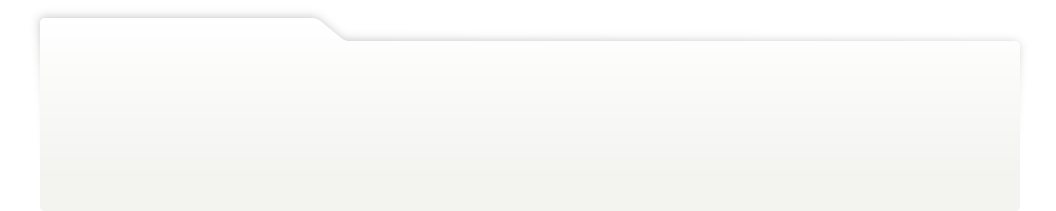
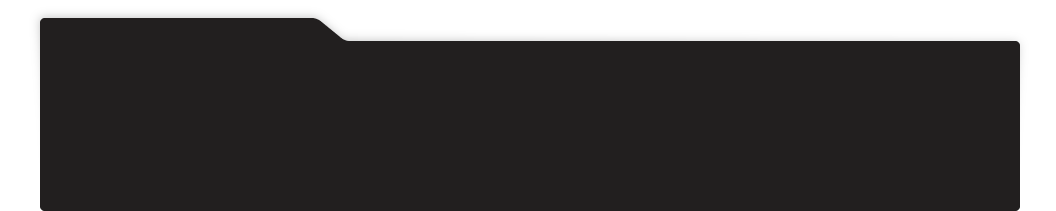
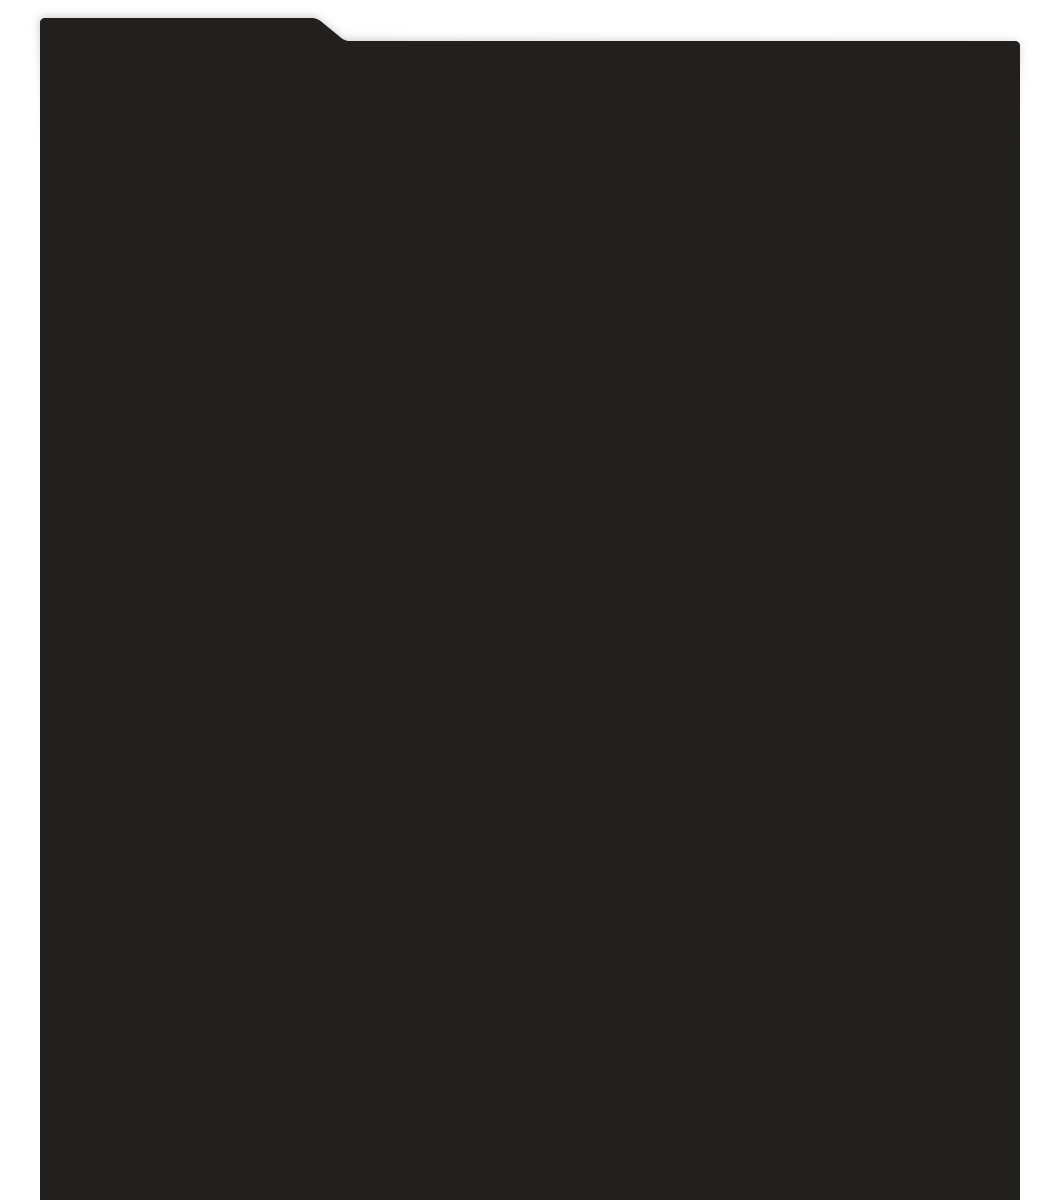
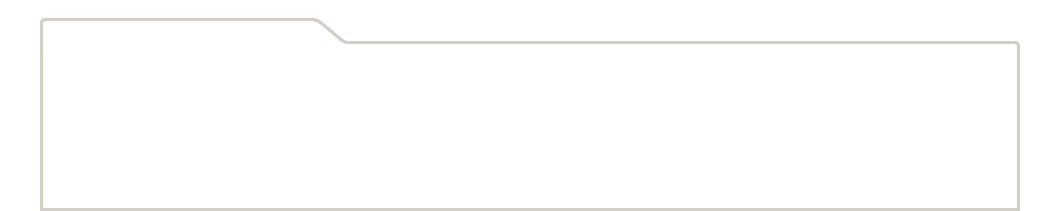
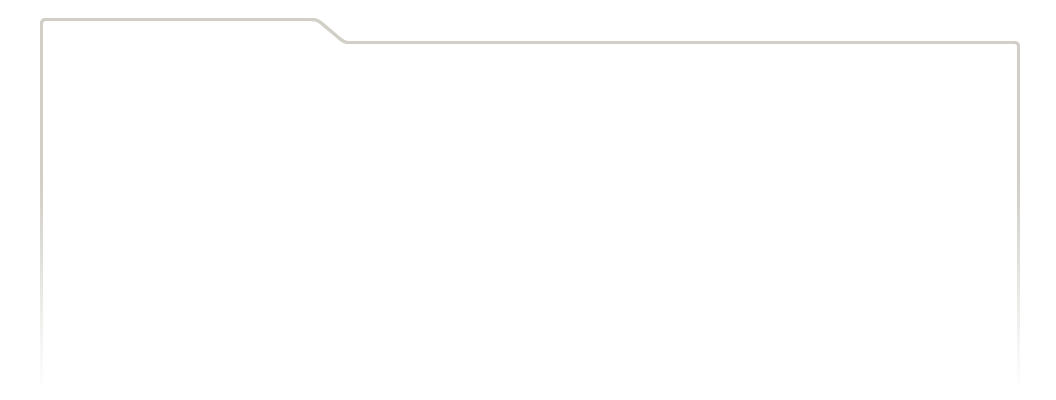
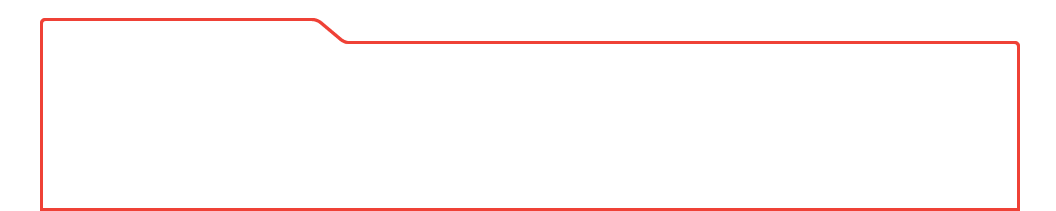
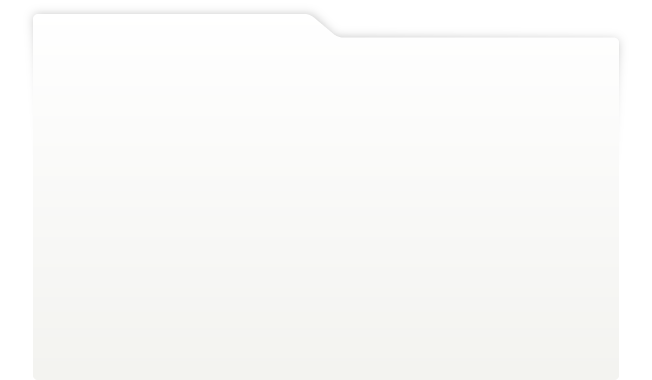
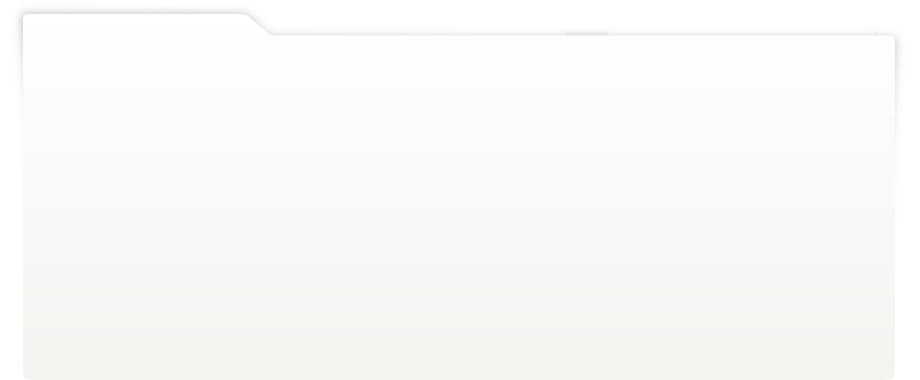
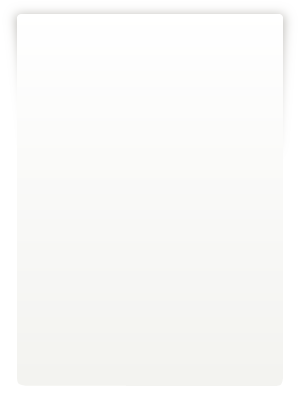
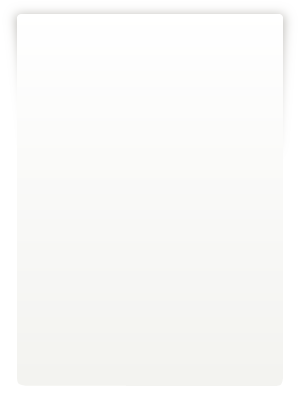
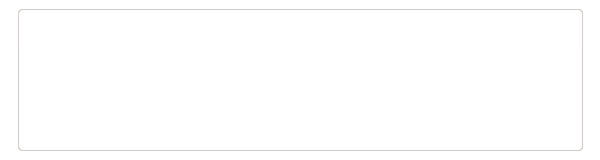
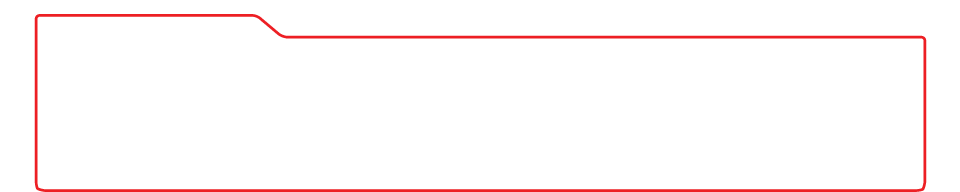
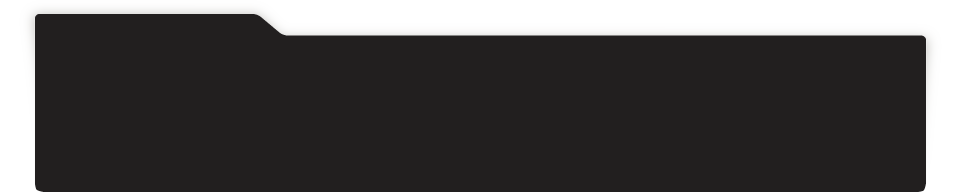
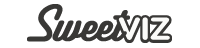
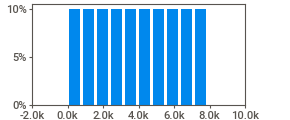
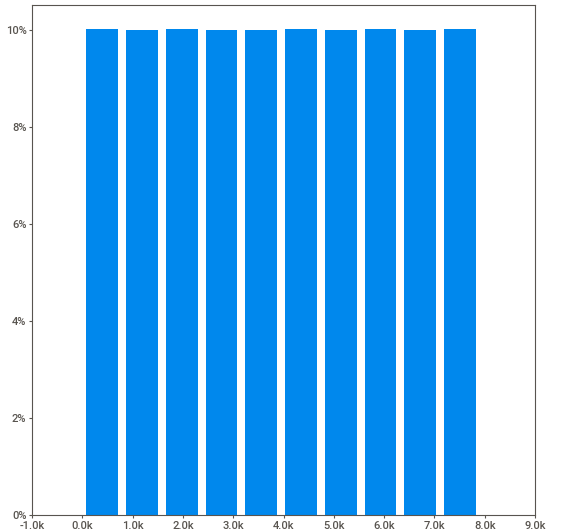
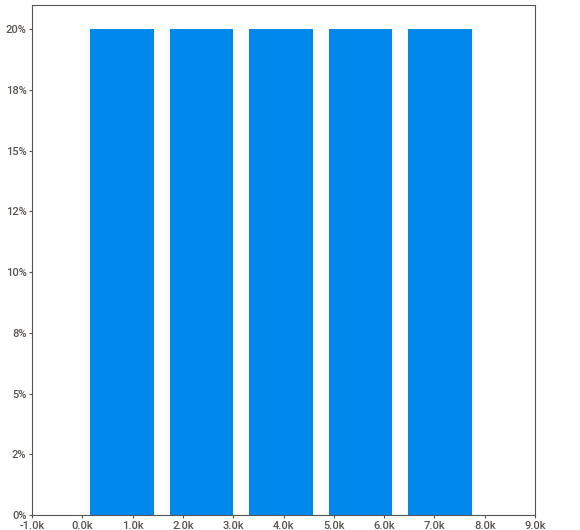
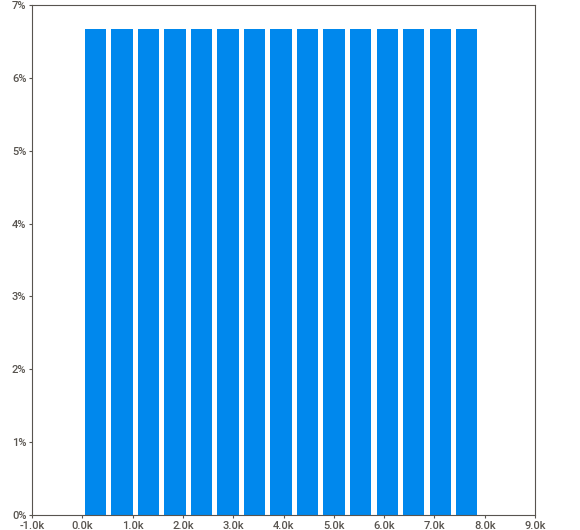
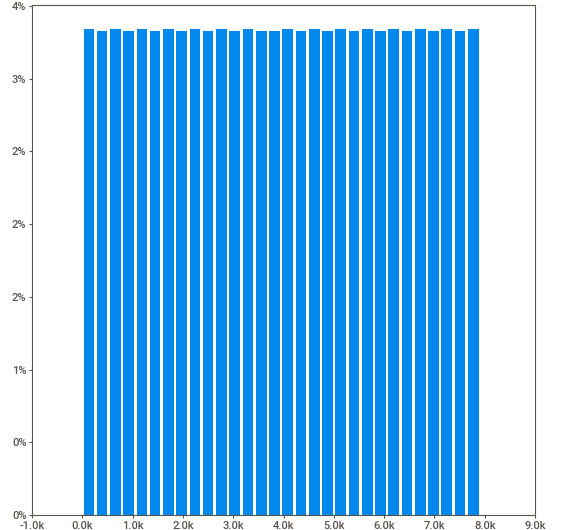
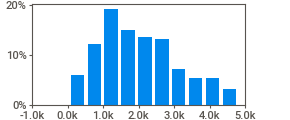
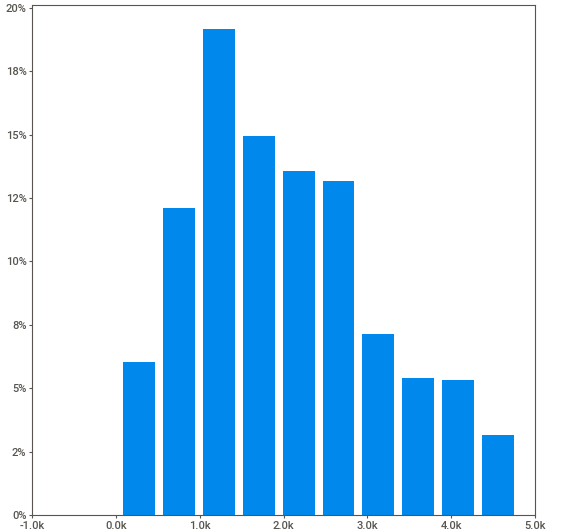
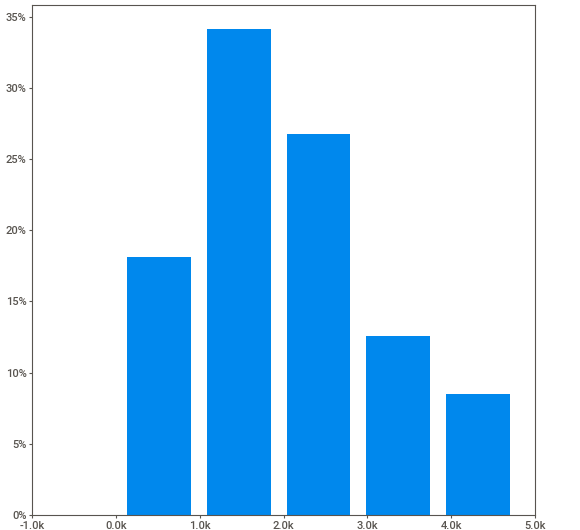
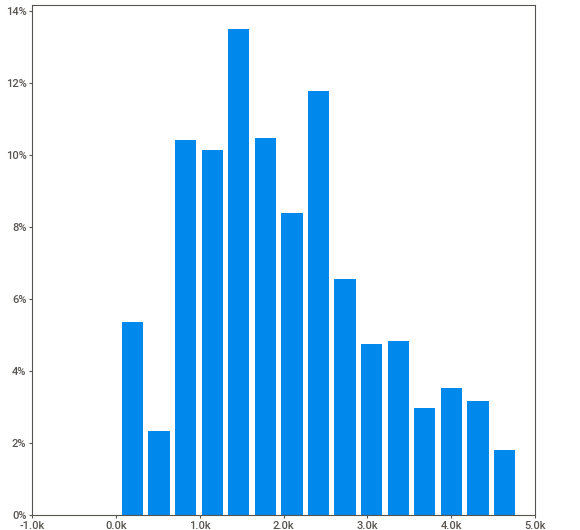
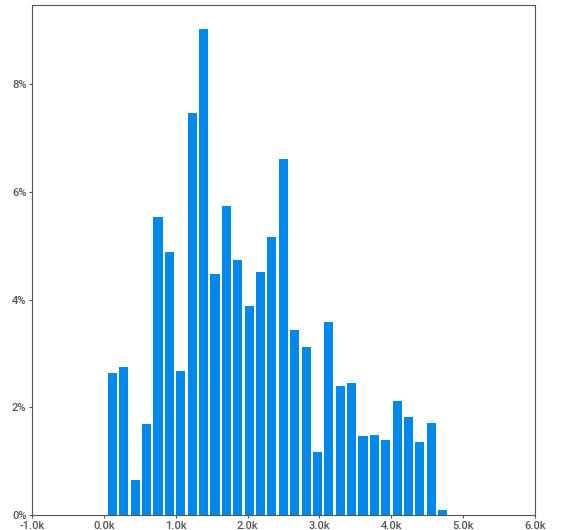
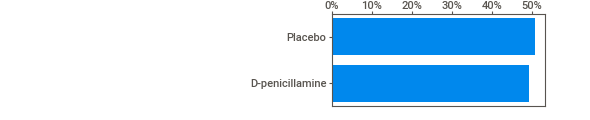
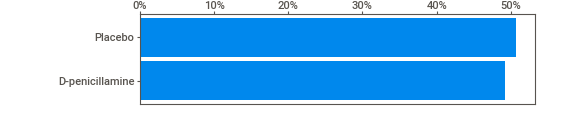
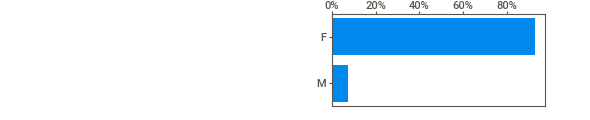
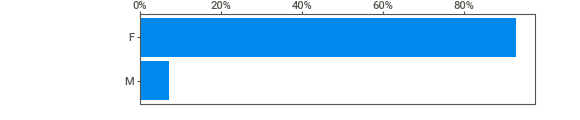
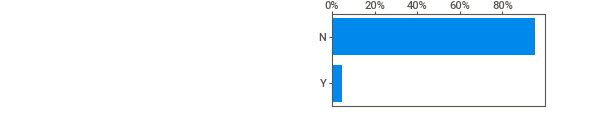
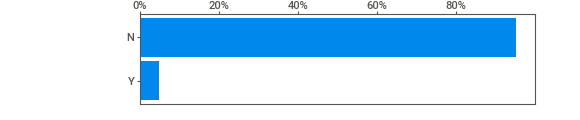
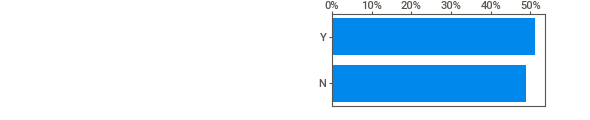
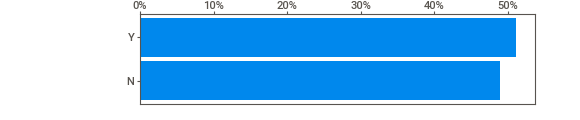
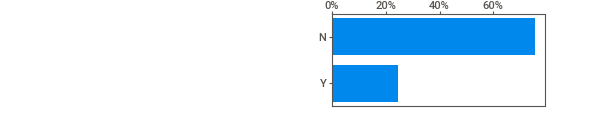
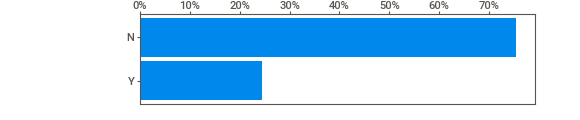
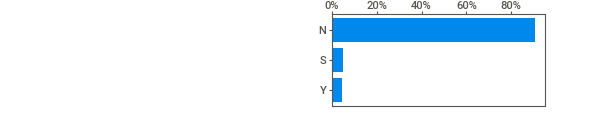
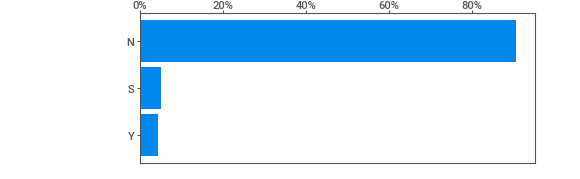
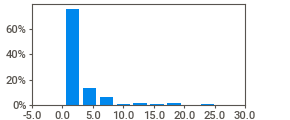
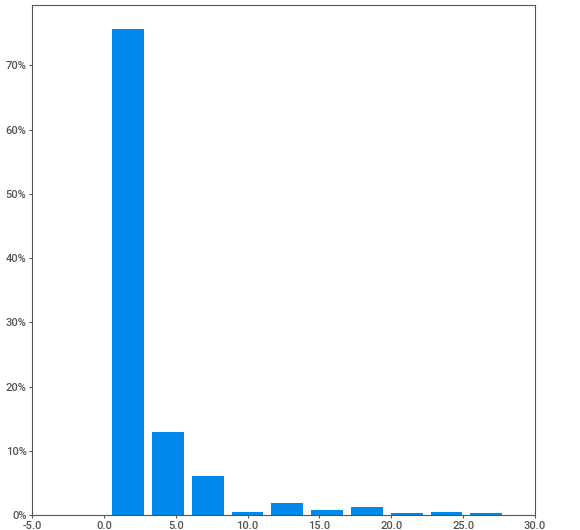
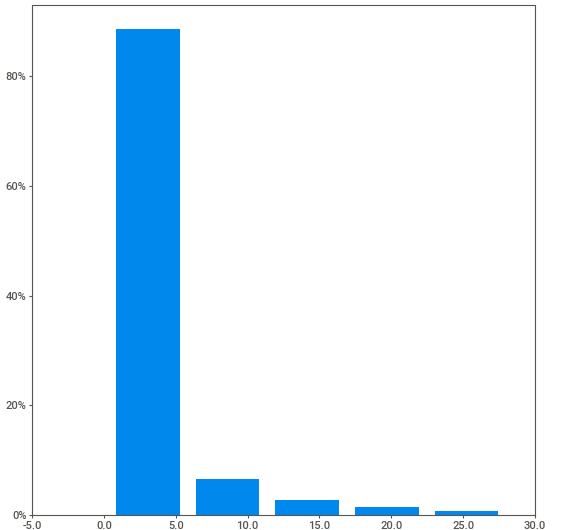
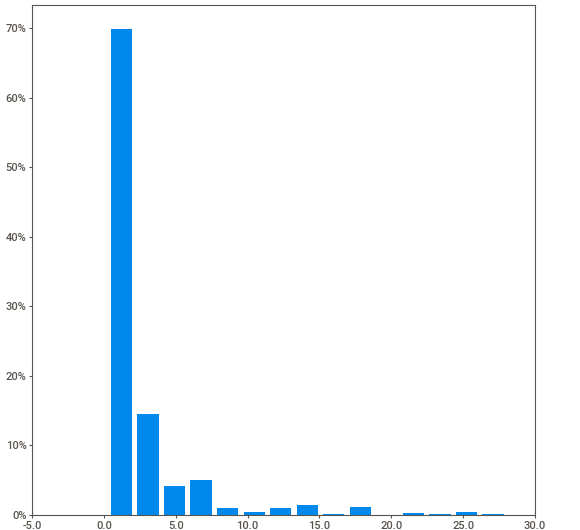
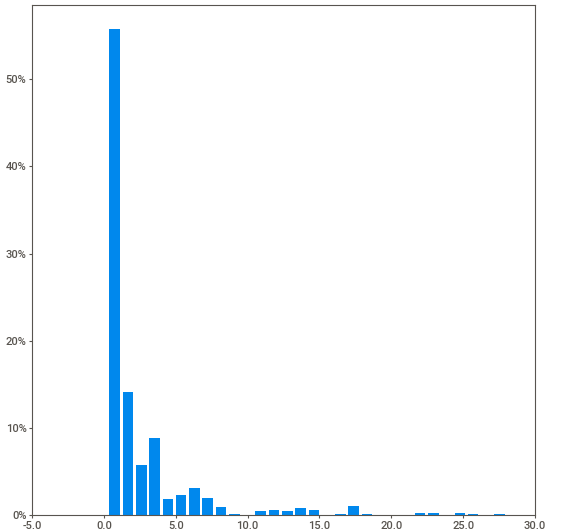
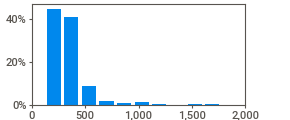
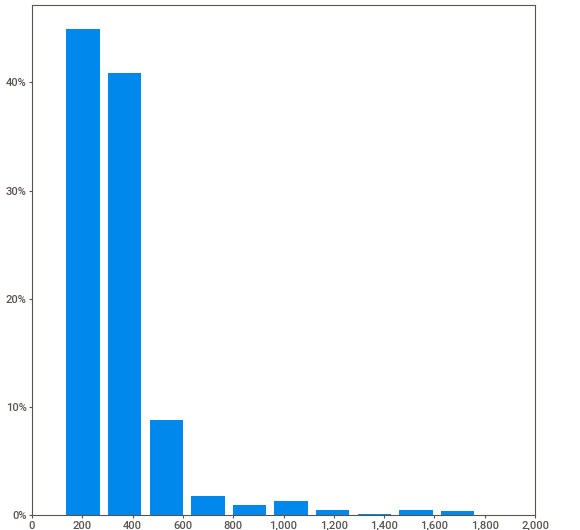
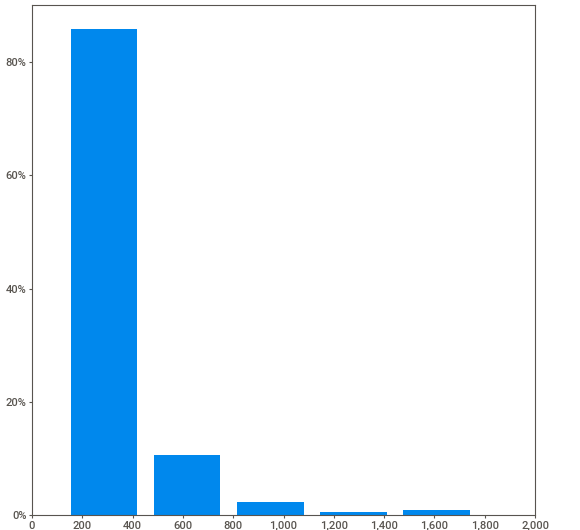
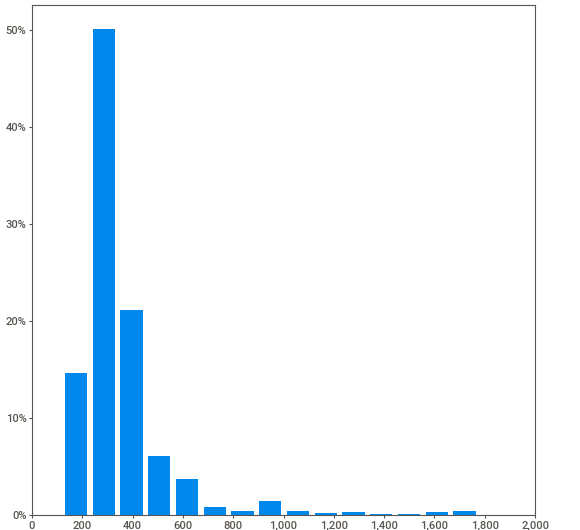
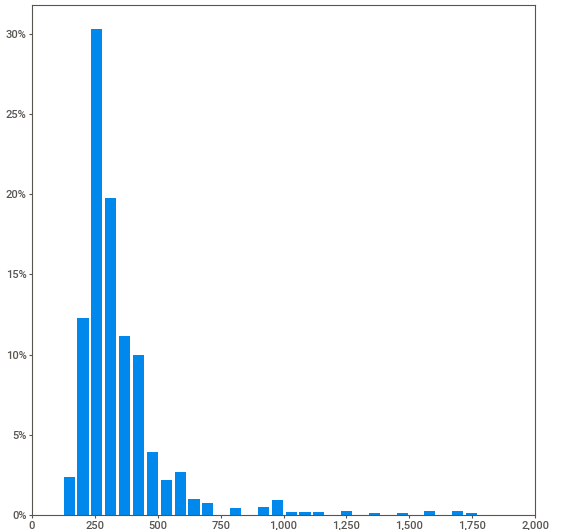
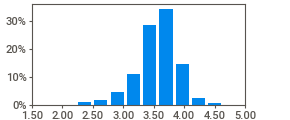
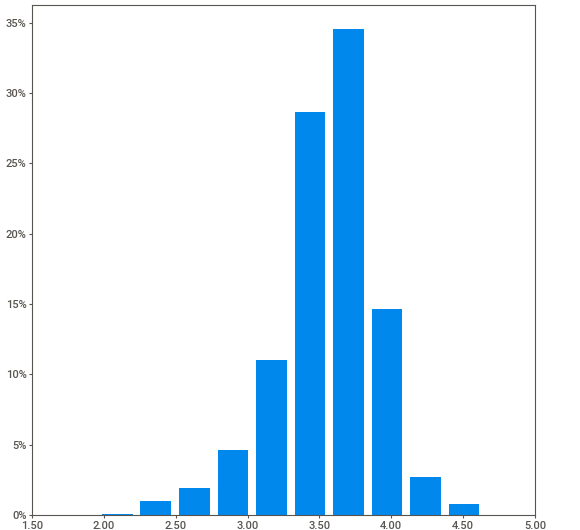
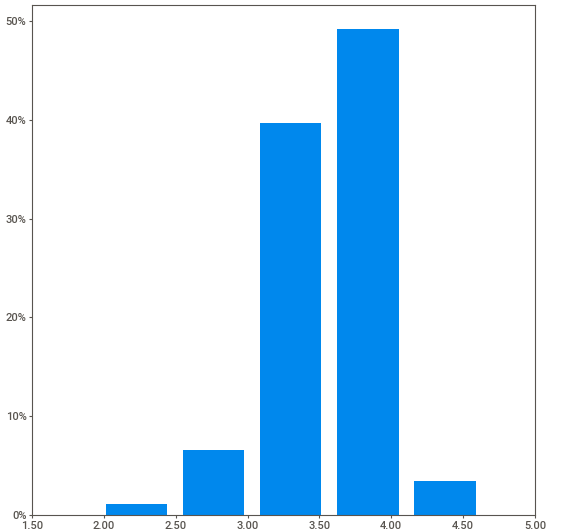
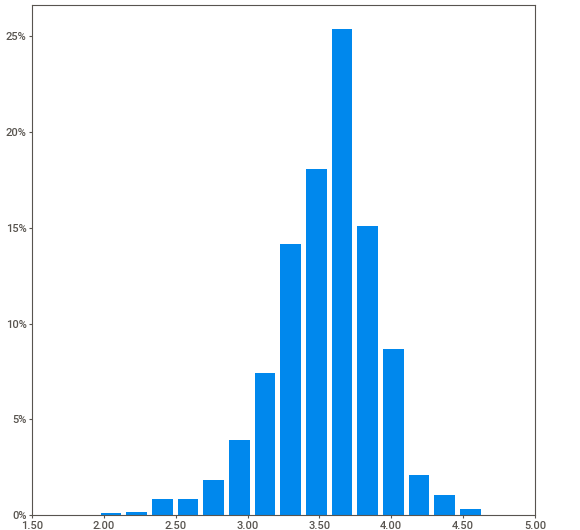
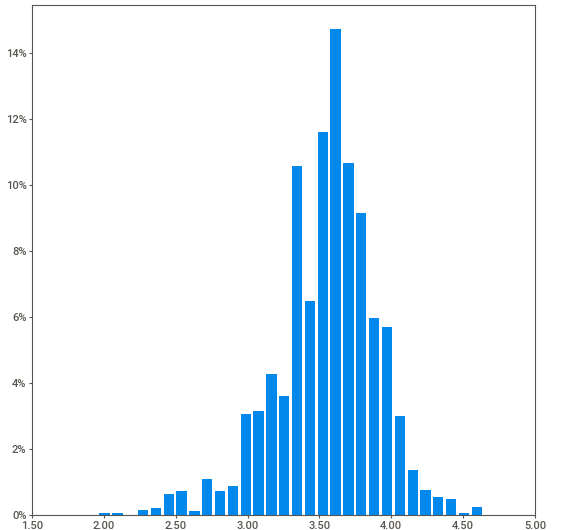
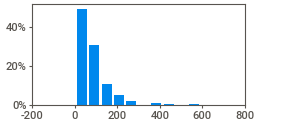
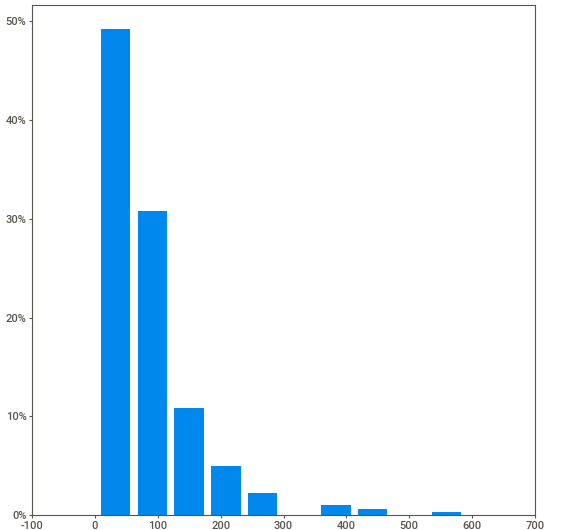
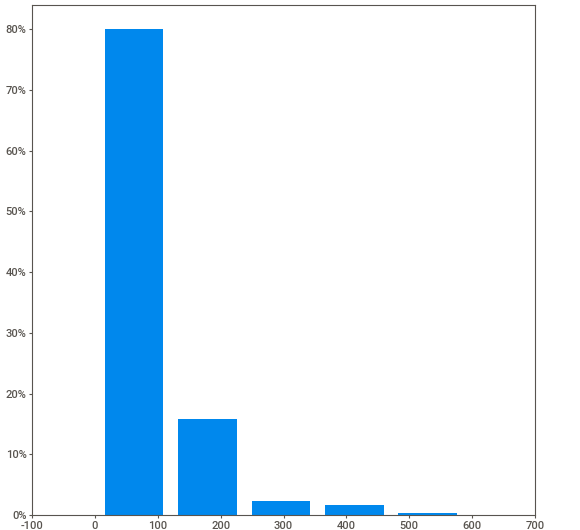
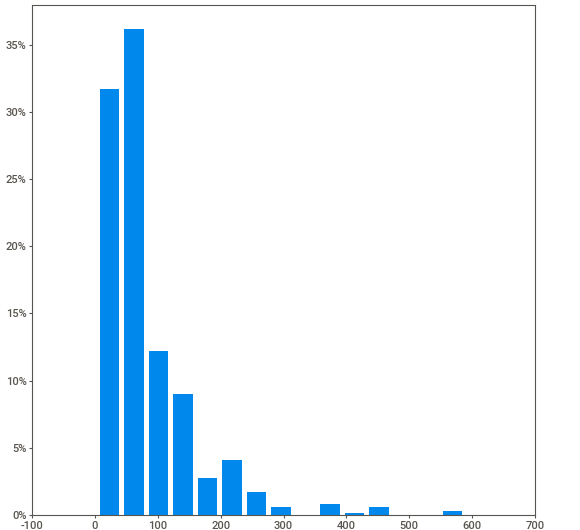
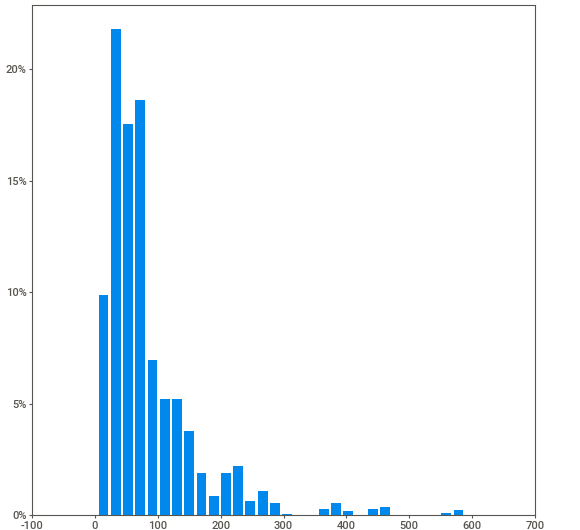
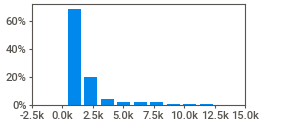
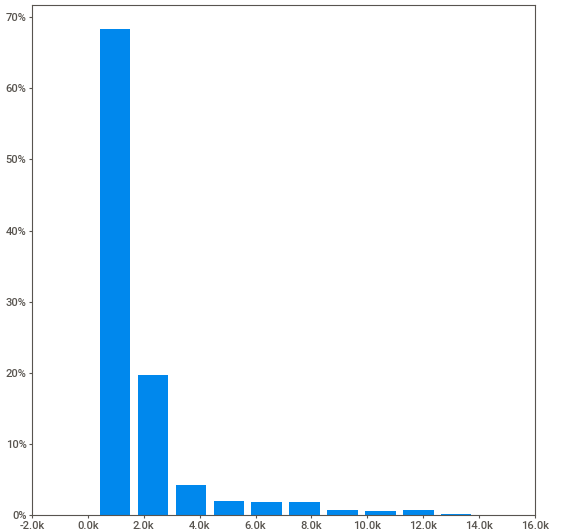
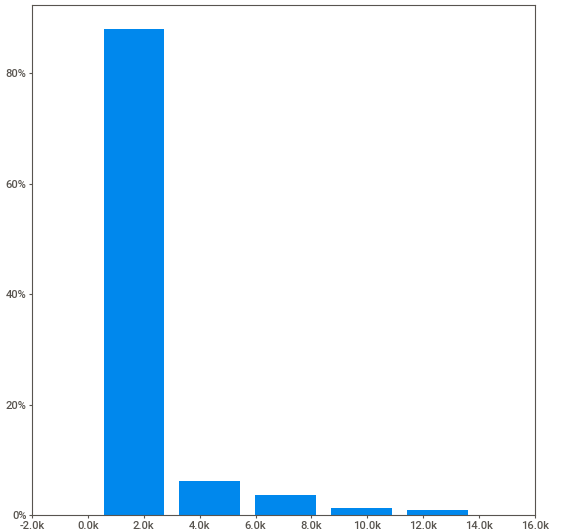
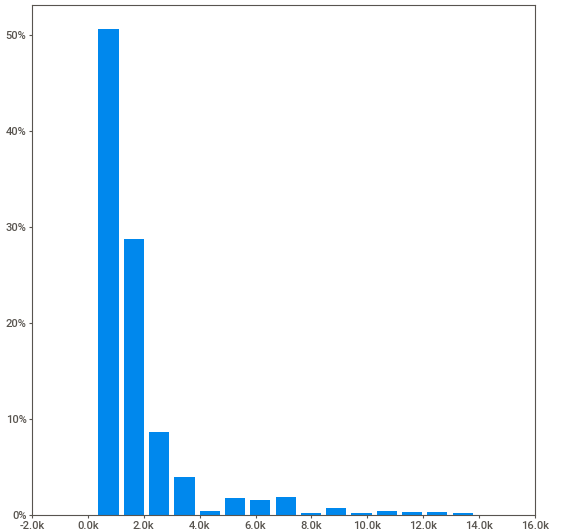
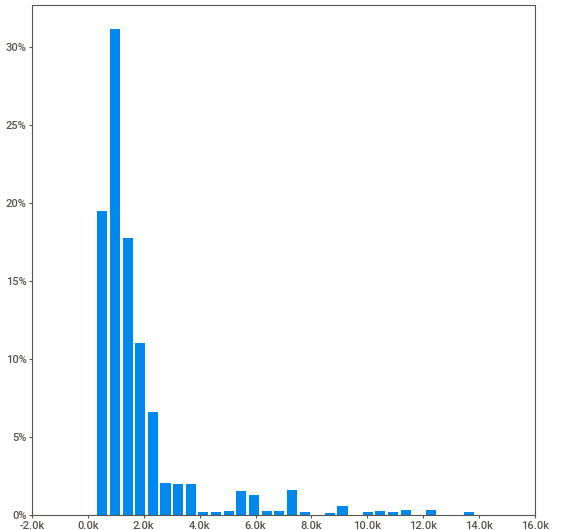
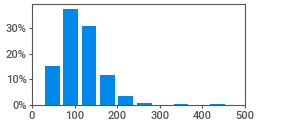
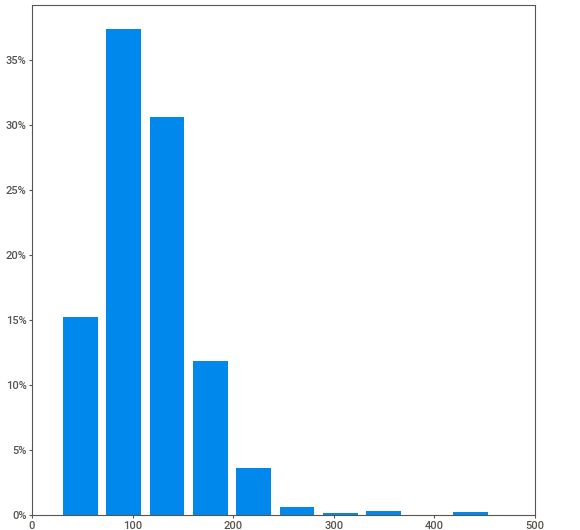
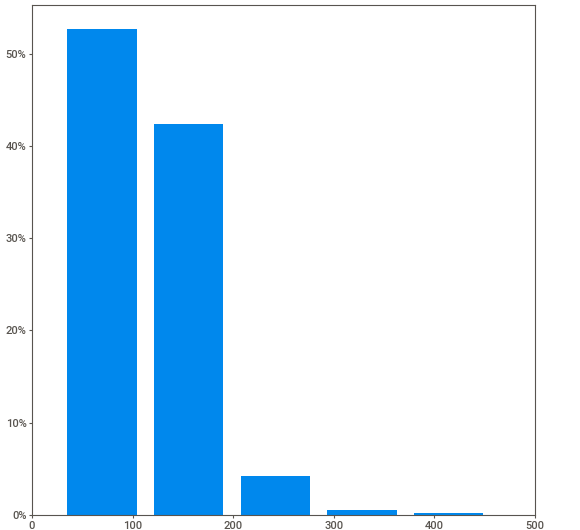
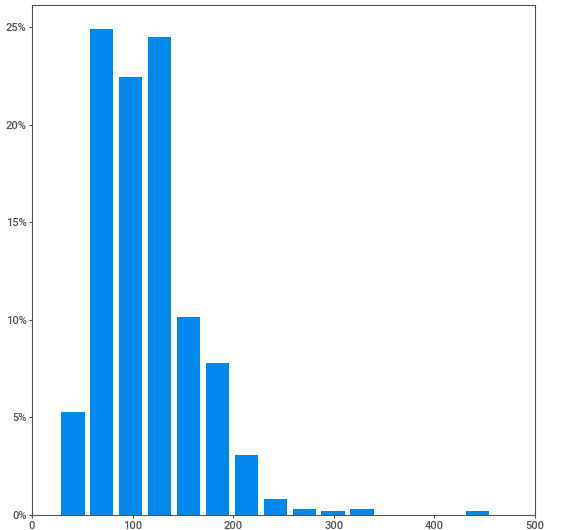
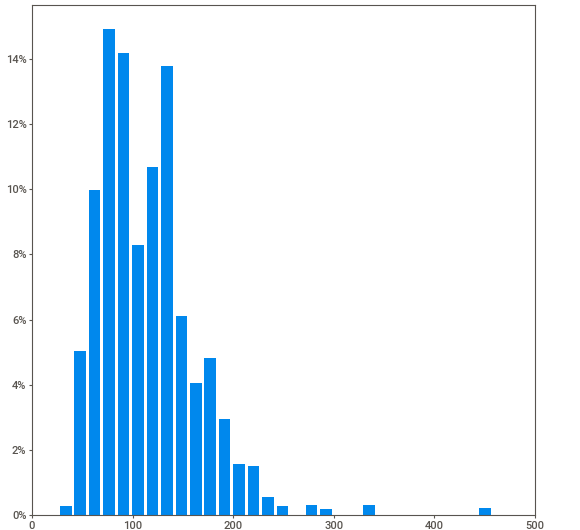
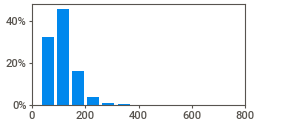
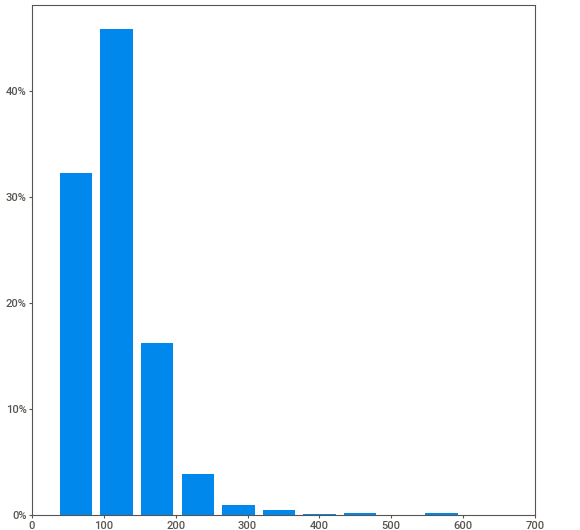
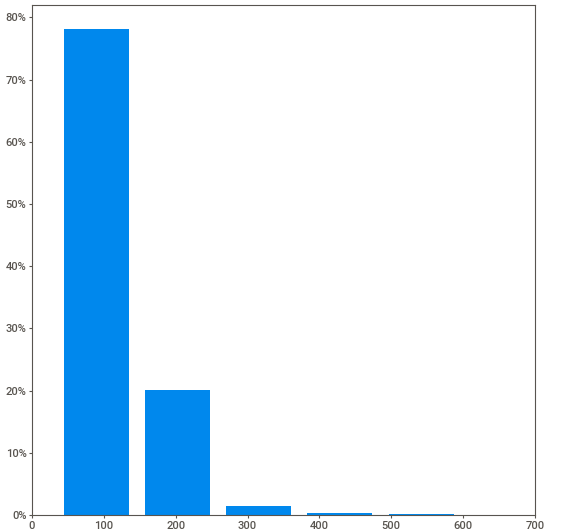
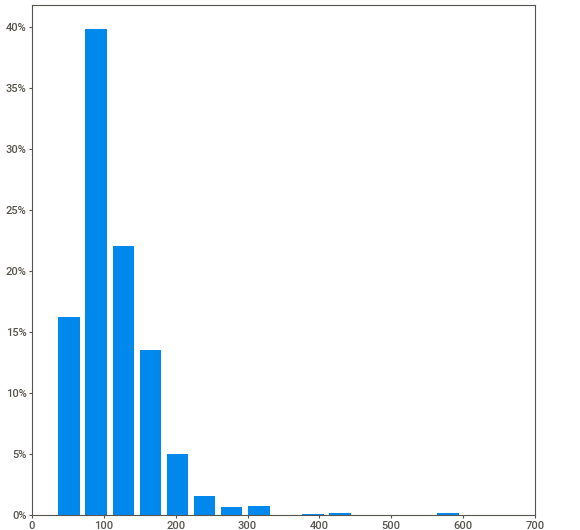
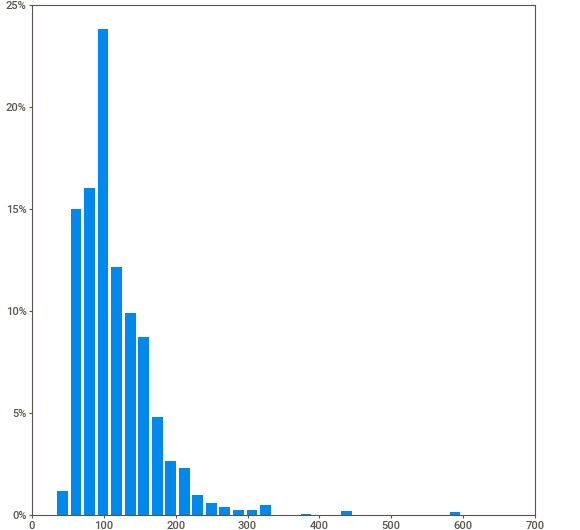
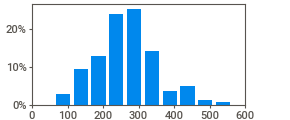
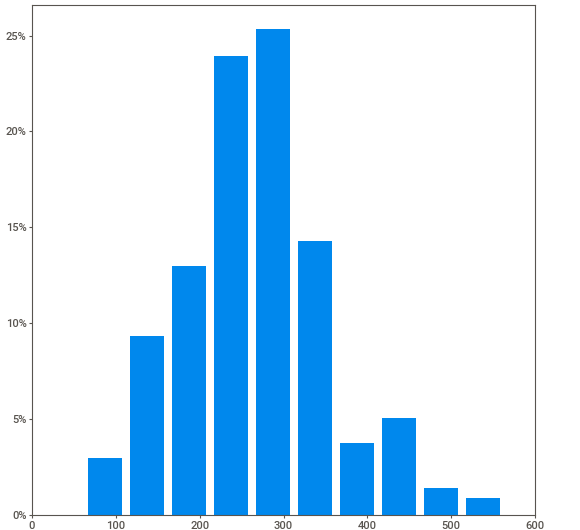
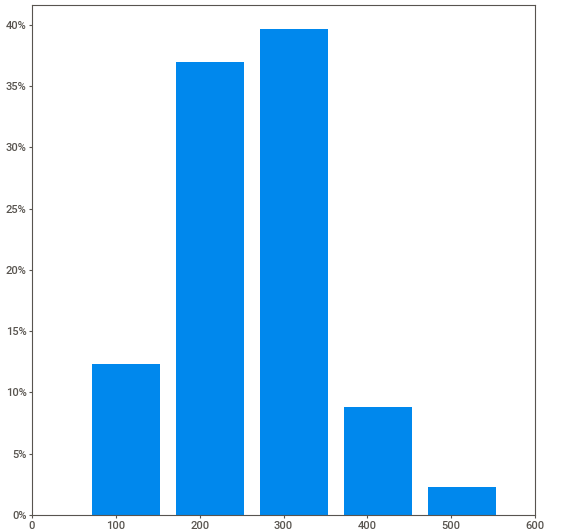
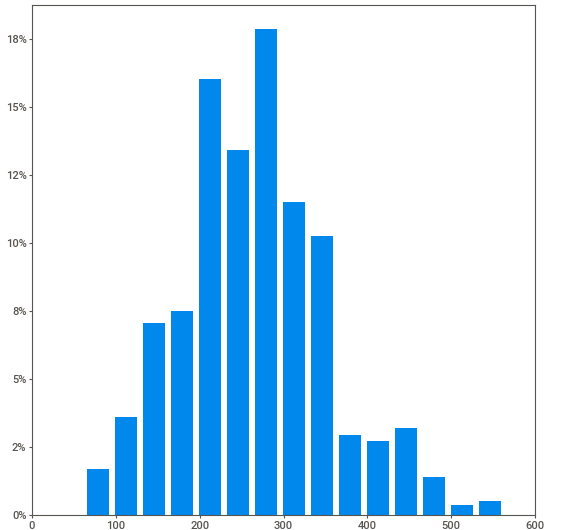
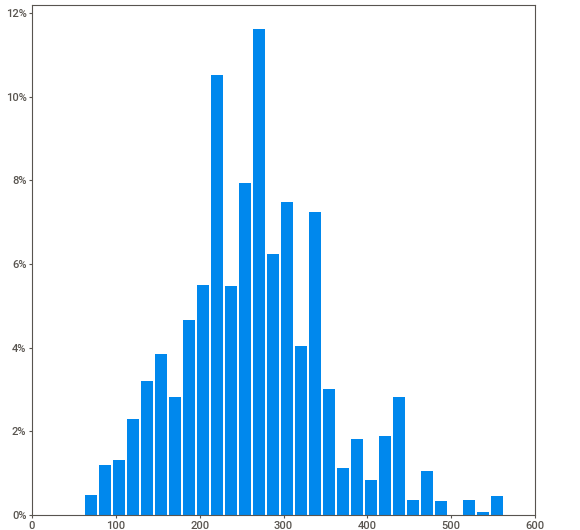
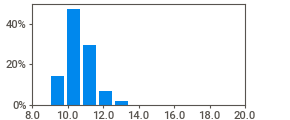
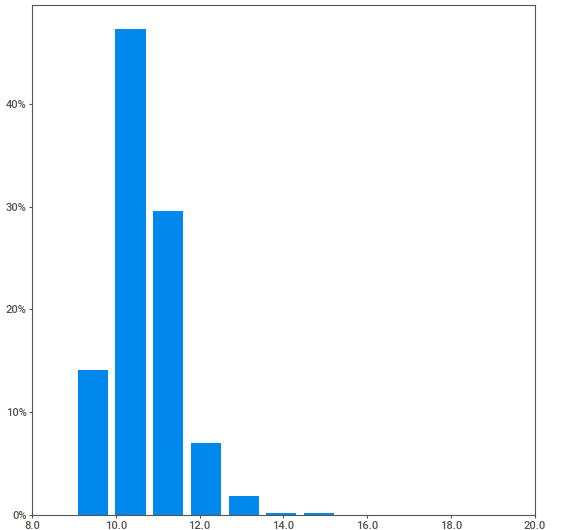
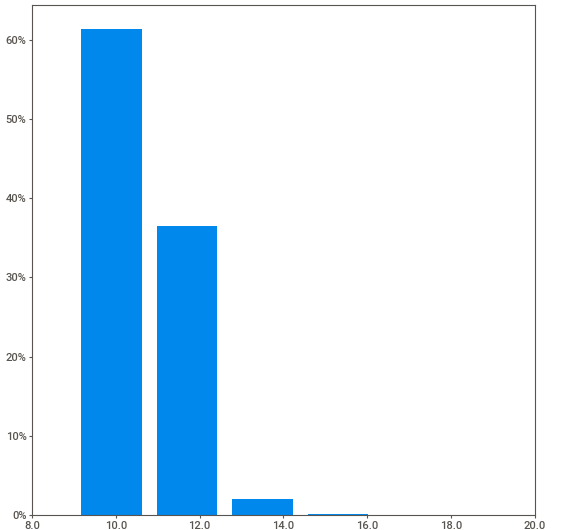
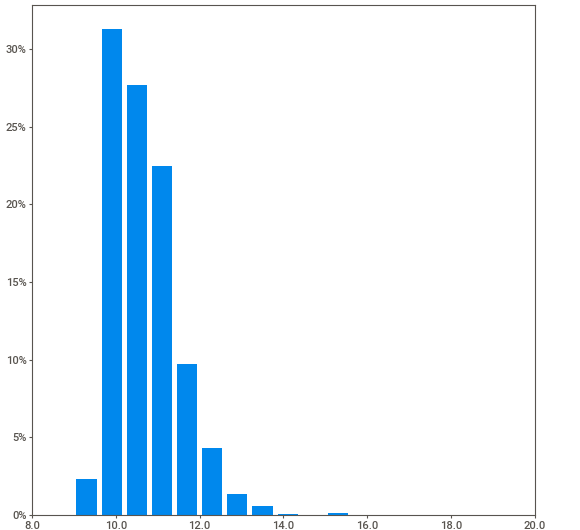
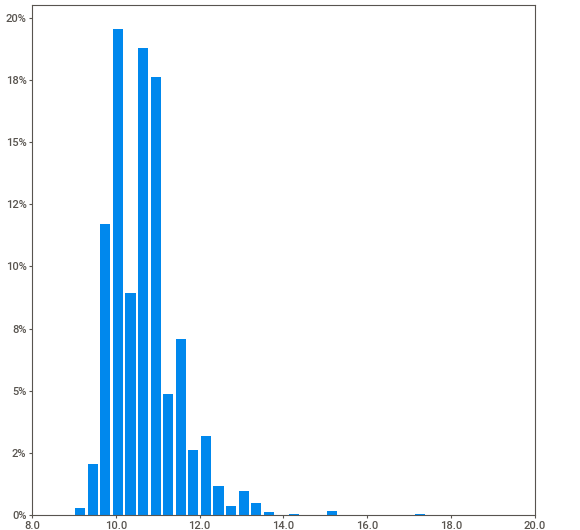
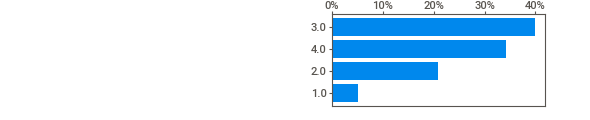
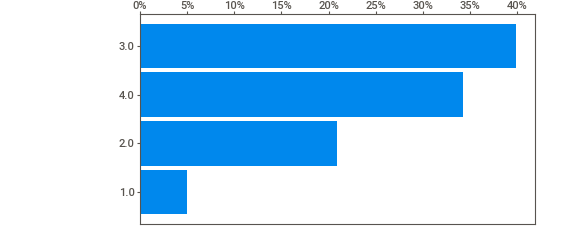
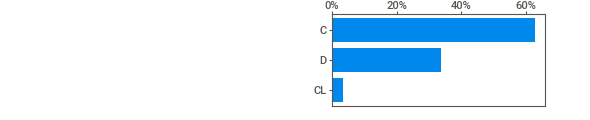
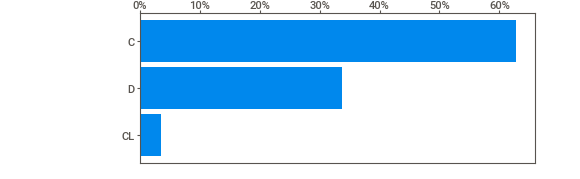
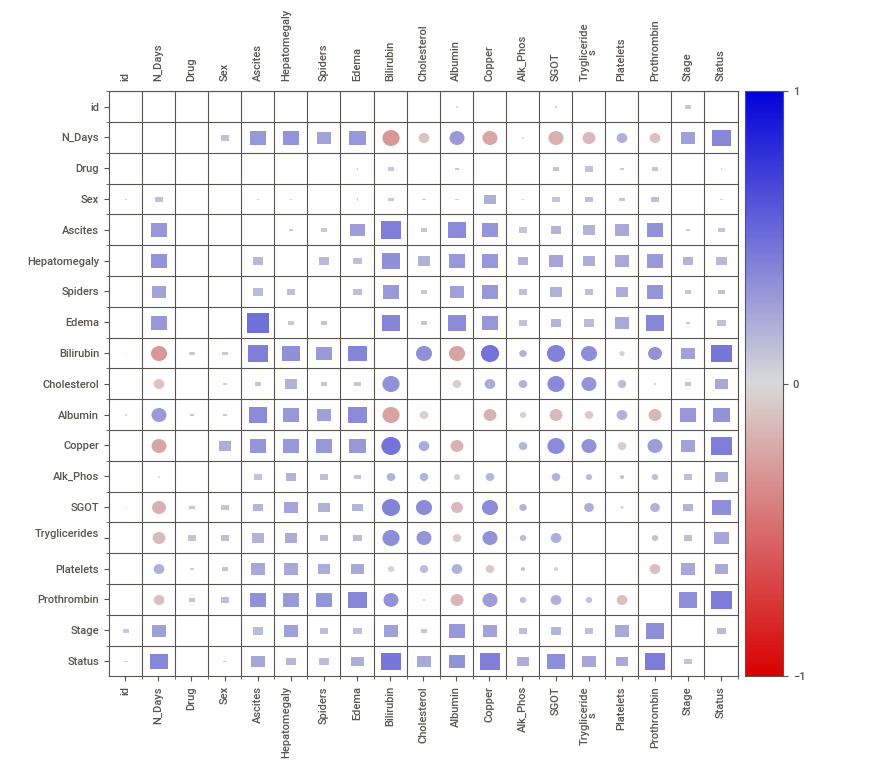
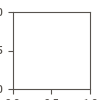

In [65]:
import sweetviz 
my_report = sweetviz.analyze([df, "Train"])
my_report.show_notebook(w="100%", h="full")       # Run this to see fill reports

#### Label Encoding categorical values

In [66]:
from sklearn import preprocessing   

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'. 
df[['Drug', 'Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']] = df[['Drug', 'Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']].apply(label_encoder.fit_transform)

In [67]:
df

,id,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,1,0,0,0,0,2.30,316.00,3.35,172.00,1601.00,179.80,63.00,394.00,9.70,3.00,2
1,1,2574,1,0,0,0,0,0,0.90,364.00,3.54,63.00,1440.00,134.85,88.00,361.00,11.00,3.00,0
2,2,3428,1,0,0,1,1,2,3.30,299.00,3.55,131.00,1029.00,119.35,50.00,199.00,11.70,4.00,2
3,3,2576,1,0,0,0,0,0,0.60,256.00,3.50,58.00,1653.00,71.30,96.00,269.00,10.70,3.00,0
4,4,788,1,0,0,1,0,0,1.10,346.00,3.65,63.00,1181.00,125.55,96.00,298.00,10.60,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,0,0,0,0,0,0.80,309.00,3.56,38.00,1629.00,79.05,224.00,344.00,9.90,2.00,0
7901,7901,1492,1,0,0,1,0,0,0.90,260.00,3.43,62.00,1440.00,142.00,78.00,277.00,10.00,4.00,0
7902,7902,1576,0,0,0,0,1,1,2.00,225.00,3.19,51.00,933.00,69.75,62.00,200.00,12.70,2.00,2
7903,7903,3584,0,1,0,1,0,0,0.70,248.00,2.75,32.00,1003.00,57.35,118.00,221.00,10.60,4.00,2


### Multigrid plot
- Bilirubin	
- Cholesterol	
- Albumin	
- Copper	
- Alk_Phos	
- SGOT	
- Tryglicerides	
- Platelets	
- Prothrombin

<Axes: xlabel='Prothrombin'>

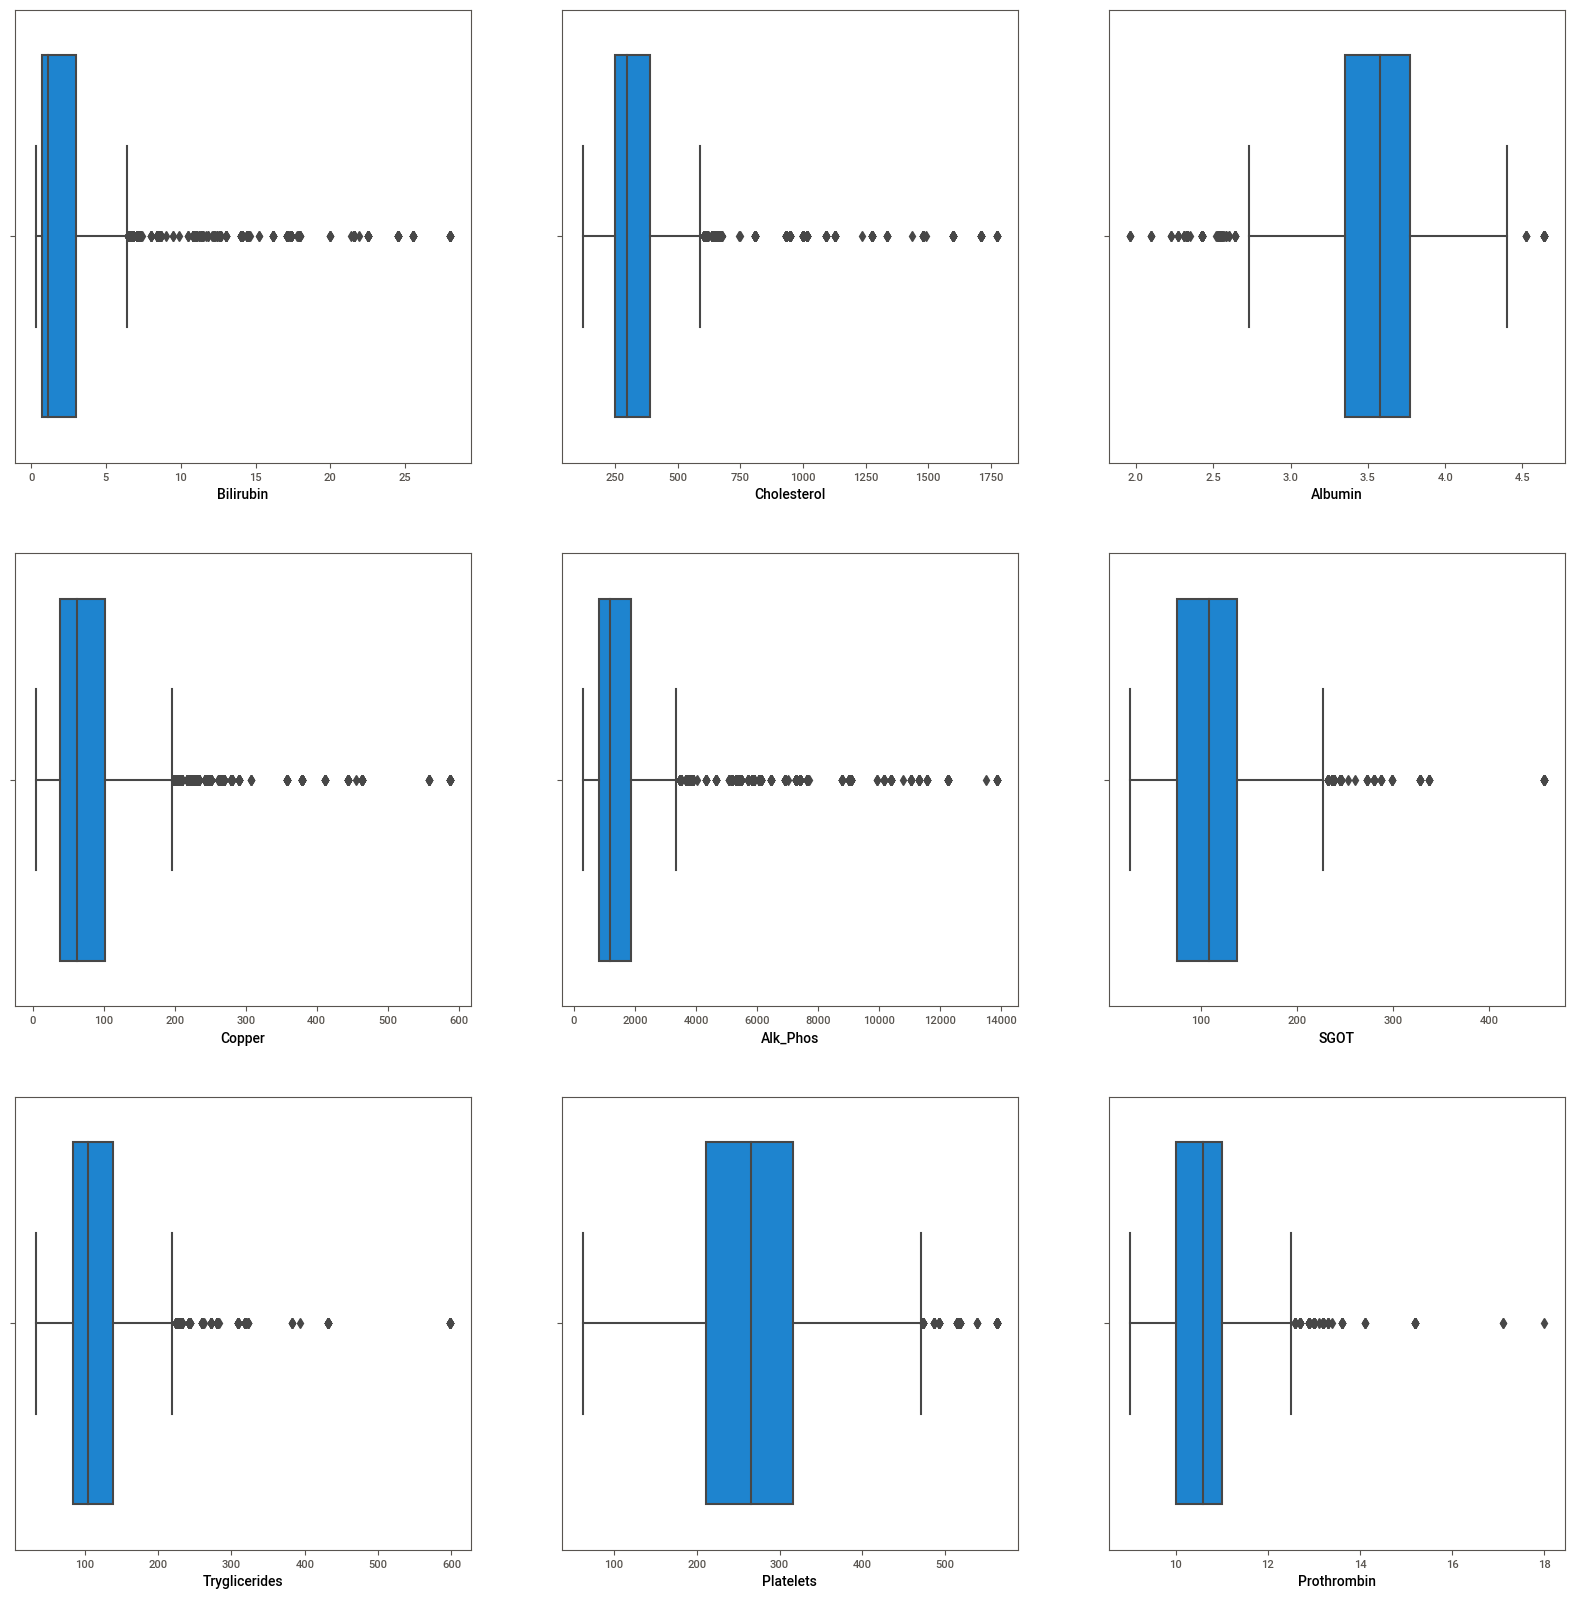

In [68]:
plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
sns.boxplot(x="Bilirubin",data=df)

plt.subplot(3,3,2)
sns.boxplot(x="Cholesterol",data=df)

plt.subplot(3,3,3)
sns.boxplot(x="Albumin",data=df)

plt.subplot(3,3,4)
sns.boxplot(x="Copper",data=df)

plt.subplot(3,3,5)
sns.boxplot(x="Alk_Phos",data=df)

plt.subplot(3,3,6)
sns.boxplot(x="SGOT",data=df)

plt.subplot(3,3,7)
sns.boxplot(x="Tryglicerides",data=df)

plt.subplot(3,3,8)
sns.boxplot(x="Platelets",data=df)

plt.subplot(3,3,9)
sns.boxplot(x="Prothrombin",data=df)

### Plotting same with plotly

In [69]:
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

# Assuming df is your DataFrame
fig = sp.make_subplots(rows=3, cols=3, subplot_titles=("Bilirubin", "Cholesterol", "Albumin",
                                                       "Copper", "Alk_Phos", "SGOT",
                                                       "Tryglicerides", "Platelets", "Prothrombin"))

# Define the box plots for each subplot
box1 = px.box(df, x="Bilirubin")
box2 = px.box(df, x="Cholesterol")
box3 = px.box(df, x="Albumin")
box4 = px.box(df, x="Copper")
box5 = px.box(df, x="Alk_Phos")
box6 = px.box(df, x="SGOT")
box7 = px.box(df, x="Tryglicerides")
box8 = px.box(df, x="Platelets")
box9 = px.box(df, x="Prothrombin")

# Add each box plot to the corresponding subplot
for box, row, col in zip([box1, box2, box3, box4, box5, box6, box7, box8, box9], [1, 1, 1, 2, 2, 2, 3, 3, 3], [1, 2, 3, 1, 2, 3, 1, 2, 3]):
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=1000, width=1700, title_text="Data Distribution of Numeric Attributes")

# Show the plot
fig.show()


#### Since we have many outliers we will use Robust scaling 

In [70]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [71]:
# df[["Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]] = df[["Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]].apply(robust_scaler.fit_transform)

In [72]:
from sklearn.preprocessing import RobustScaler

# Create an instance of RobustScaler
robust_scaler = RobustScaler()

# Specify the columns you want to scale
columns_to_scale = ["Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"]

# Apply the RobustScaler to the specified columns
df[columns_to_scale] = robust_scaler.fit_transform(df[columns_to_scale])


In [73]:
df

,id,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,1,0,0,0,0,0.52,0.13,-0.55,1.73,0.41,1.15,-0.75,1.23,-0.90,3.00,2
1,1,2574,1,0,0,0,0,0,-0.09,0.46,-0.10,0.00,0.25,0.42,-0.29,0.91,0.40,3.00,0
2,2,3428,1,0,0,1,1,2,0.96,0.01,-0.07,1.08,-0.15,0.17,-0.98,-0.63,1.10,4.00,2
3,3,2576,1,0,0,0,0,0,-0.22,-0.30,-0.19,-0.08,0.46,-0.60,-0.15,0.04,0.10,3.00,0
4,4,788,1,0,0,1,0,0,0.00,0.34,0.17,0.00,0.00,0.28,-0.15,0.31,0.00,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,0,0,0,0,0,-0.13,0.08,-0.05,-0.40,0.44,-0.48,2.18,0.75,-0.70,2.00,0
7901,7901,1492,1,0,0,1,0,0,-0.09,-0.27,-0.36,-0.02,0.25,0.54,-0.47,0.11,-0.60,4.00,0
7902,7902,1576,0,0,0,0,1,1,0.39,-0.51,-0.93,-0.19,-0.24,-0.63,-0.76,-0.62,2.10,2.00,2
7903,7903,3584,0,1,0,1,0,0,-0.17,-0.35,-1.98,-0.49,-0.17,-0.83,0.25,-0.42,0.00,4.00,2


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   int32  
 3   Sex            7905 non-null   int32  
 4   Ascites        7905 non-null   int32  
 5   Hepatomegaly   7905 non-null   int32  
 6   Spiders        7905 non-null   int32  
 7   Edema          7905 non-null   int32  
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [75]:
X = df.drop(columns=["id","N_Days","Status"])
y = df["Status"]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6324, 16)
X_test shape: (1581, 16)
y_train shape: (6324,)
y_test shape: (1581,)


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [79]:
models=[]
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [80]:
scoring='accuracy'

In [81]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [82]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0, shuffle = True)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

DecisionTreeClassifier()
Decision Tree 0.729918
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.785897
RandomForestClassifier()
Random Forest 0.806452
SVC()
Support Vector Classifier 0.800599
KNeighborsClassifier()
K- Neirest Neighbour 0.777828
GaussianNB()
Naive Bayes 0.750316


In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

SV=SVC()
SV.fit(X_train,y_train)
pred=SV.predict(X_test)
print("Model Accuracy:- ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Model Accuracy:-  0.803921568627451
[[891   0  75]
 [ 32   1  19]
 [184   0 379]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       966
           1       1.00      0.02      0.04        52
           2       0.80      0.67      0.73       563

    accuracy                           0.80      1581
   macro avg       0.87      0.54      0.54      1581
weighted avg       0.81      0.80      0.79      1581



In [84]:
from lazypredict.Supervised import LazyClassifier

In [85]:
reg = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:24<00:00,  1.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 16
[LightGBM] [Info] Start training from score -0.458308
[LightGBM] [Info] Start training from score -3.344935
[LightGBM] [Info] Start training from score -1.101463


100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.82,0.60,None,0.81,1.09
LGBMClassifier,0.83,0.60,None,0.82,0.44
NearestCentroid,0.67,0.58,None,0.73,0.02
RandomForestClassifier,0.82,0.58,None,0.81,2.23
BaggingClassifier,0.79,0.57,None,0.78,0.83
ExtraTreesClassifier,0.81,0.57,None,0.80,1.52
AdaBoostClassifier,0.81,0.55,None,0.80,0.68
SGDClassifier,0.80,0.54,None,0.79,0.13
SVC,0.80,0.54,None,0.78,2.77


In [86]:
df_test = pd.read_csv('test.csv')
df_test

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.20,546.00,3.37,65.00,1636.00,151.90,90.00,430.00,10.60,2.00
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.10,660.00,4.22,94.00,1257.00,151.90,155.00,227.00,10.00,2.00
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.00,151.00,2.96,46.00,961.00,69.75,101.00,213.00,13.00,4.00
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.60,293.00,3.85,40.00,554.00,125.55,56.00,270.00,10.60,2.00
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.40,277.00,2.97,121.00,1110.00,125.00,126.00,221.00,9.80,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.30,302.00,3.43,75.00,1345.00,145.00,44.00,181.00,10.60,3.00
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.50,219.00,4.09,121.00,663.00,79.05,94.00,311.00,9.70,3.00
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.80,315.00,4.09,13.00,1637.00,170.50,70.00,426.00,10.90,3.00
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.70,329.00,3.80,52.00,678.00,57.00,126.00,306.00,10.20,1.00
